In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Cleaning

In [2]:
# Load the dataset
file_path = r'C:\Users\aiburale\DataspellProjects\healthcare-data-analysis\healthcare dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [4]:
# Correct data types
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['date_of_admission'] = pd.to_datetime(data['date_of_admission'], errors='coerce')
data['discharge_date'] = pd.to_datetime(data['discharge_date'], errors='coerce')

In [5]:
# Handle missing values by filling with appropriate values or dropping rows if necessary
data.fillna({
    'age': data['age'].median(),
    'blood_type': 'Unknown',
    'medical_condition': 'Unknown',
    'doctor_name': 'Unknown',
    'hospital_name': 'Unknown',
    'insurance_provider': 'Unknown',
    'billing_amount': data['billing_amount'].median(),
    'room_number': -1,
    'admission_type': 'Unknown',
    'discharge_date': data['date_of_admission'],  # Assume same day discharge if missing
    'medication': 'Unknown',
    'test_results': 'Unknown'
}, inplace=True)

In [16]:
# Sample data
data = pd.DataFrame({
    'patient_name': ['Bobby JacksOn', 'LesLie TErRy', 'DaNnY sMitH', 'andrEw waTtS', 'adrIENNE bEll',
                     'EMILY JOHNSOn', 'edwArD EDWaRDs', 'CHrisTInA MARtinez', 'JASmINe aGuIlaR', 'ChRISTopher BerG',
                     'mIchElLe daniELs', 'aaRon MARtiNeZ', 'connOR HANsEn', 'rObeRt bAuer', 'bROOkE brady',
                     'MS. nAtalIE gAMble', 'haley perkins', 'mRS. jamiE cAMPBELl', 'LuKE BuRgEss', 'dANIEL schmIdt'],
    'age': [30, 62, 76, 28, 43, 36, 21, 20, 82, 58, 72, 38, 75, 68, 44, 46, 63, 38, 34, 63],
    'gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'blood_type': ['B-', 'A+', 'A-', 'O+', 'AB+', 'A+', 'AB-', 'A+', 'AB+', 'AB-', 'O+', 'A-', 'A+', 'AB+', 'AB+',
                   'AB-', 'A+', 'AB-', 'A-', 'B+'],
    'medical_condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Diabetes', 'Cancer',
                          'Asthma', 'Cancer', 'Cancer', 'Hypertension', 'Diabetes', 'Asthma', 'Cancer', 'Obesity',
                          'Arthritis', 'Obesity', 'Hypertension', 'Asthma'],
    'date_of_admission': ['2024-01-31', '2019-08-20', '2022-09-22', '2020-11-18', '2022-09-19', '2023-12-20',
                          '2020-11-03', '2021-12-28', '2020-07-01', '2021-05-23', '2020-04-19', '2023-08-13',
                          '2019-12-12', '2020-05-22', '2021-10-08', '2023-01-01', '2020-06-23', '2020-03-08',
                          '2021-03-04', '2022-11-15'],
    'doctor_name': ['Matthew Smith', 'Samantha Davies', 'Tiffany Mitchell', 'Kevin Wells', 'Kathleen Hanna',
                    'Taylor Newton', 'Kelly Olson', 'Suzanne Thomas', 'Daniel Ferguson', 'Heather Day', 'John Duncan',
                    'Douglas Mayo', 'Kenneth Fletcher', 'Theresa Freeman', 'Roberta Stewart', 'Maria Dougherty',
                    'Erica Spencer', 'Justin Kim', 'Justin Moore Jr.', 'Denise Galloway'],
    'hospital_name': ['Sons and Miller', 'Kim Inc', 'Cook PLC', 'Hernandez Rogers and Vang,', 'White-White',
                      'Nunez-Humphrey', 'Group Middleton', 'Powell Robinson and Valdez,', 'Sons Rich and',
                      'Padilla-Walker', 'Schaefer-Porter', 'Lyons-Blair', 'Powers Miller, and Flores', 'Rivera-Gutierrez',
                      'Morris-Arellano', 'Cline-Williams', 'Cervantes-Wells', 'Torres, and Harrison Jones', 'Houston PLC',
                      'Hammond Ltd'],
    'insurance_provider': ['Blue Cross', 'Medicare', 'Aetna', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Medicare',
                           'Cigna', 'Cigna', 'UnitedHealthcare', 'Medicare', 'Medicare', 'Cigna', 'UnitedHealthcare',
                           'UnitedHealthcare', 'Blue Cross', 'UnitedHealthcare', 'Cigna', 'Blue Cross', 'Cigna'],
    'billing_amount': [18856.28131, 33643.32729, 27955.09608, 37909.78241, 14238.31781, 48145.11095, 19580.87234,
                       45820.46272, 50119.22279, 19784.63106, 12576.79561, 7999.58688, 43282.28336, 33207.70663,
                       40701.59923, 12263.35743, 24499.8479, 17440.46544, 18843.02302, 23762.20358],
    'room_number': [328, 265, 205, 450, 458, 389, 389, 277, 316, 249, 394, 288, 134, 309, 182, 465, 114, 449, 260, 465],
    'admission_type': ['Urgent', 'Emergency', 'Emergency', 'Elective', 'Urgent', 'Urgent', 'Emergency', 'Emergency',
                       'Elective', 'Elective', 'Urgent', 'Urgent', 'Emergency', 'Urgent', 'Urgent', 'Elective', 'Elective',
                       'Urgent', 'Elective', 'Elective'],
    'discharge_date': ['2024-02-02', '2019-08-26', '2022-10-07', '2020-12-18', '2022-10-09', '2023-12-24', '2020-11-15',
                       '2022-01-07', '2020-07-14', '2021-06-22', '2020-04-22', '2023-09-05', '2019-12-28', '2020-06-19',
                       '2021-10-13', '2023-01-11', '2020-07-14', '2020-04-02', '2021-03-14', '2022-11-22'],
    'medication': ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Ibuprofen', 'Penicillin', 'Ibuprofen', 'Paracetamol',
                   'Paracetamol', 'Aspirin', 'Paracetamol', 'Paracetamol', 'Lipitor', 'Penicillin', 'Lipitor',
                   'Paracetamol', 'Aspirin', 'Paracetamol', 'Paracetamol', 'Aspirin', 'Penicillin'],
    'test_results': ['Normal', 'Inconclusive', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Inconclusive', 'Inconclusive',
                     'Abnormal', 'Inconclusive', 'Normal', 'Inconclusive', 'Abnormal', 'Normal', 'Normal', 'Inconclusive',
                     'Normal', 'Abnormal', 'Abnormal', 'Normal']
})


In [17]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [18]:
# Correct data types
data['date_of_admission'] = pd.to_datetime(data['date_of_admission'])
data['discharge_date'] = pd.to_datetime(data['discharge_date'])

In [19]:
# Display cleaned data
data.head()

,patient_name,age,gender,blood_type,medical_condition,date_of_admission,doctor_name,hospital_name,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal


# Exploratory Data Analysis (EDA)

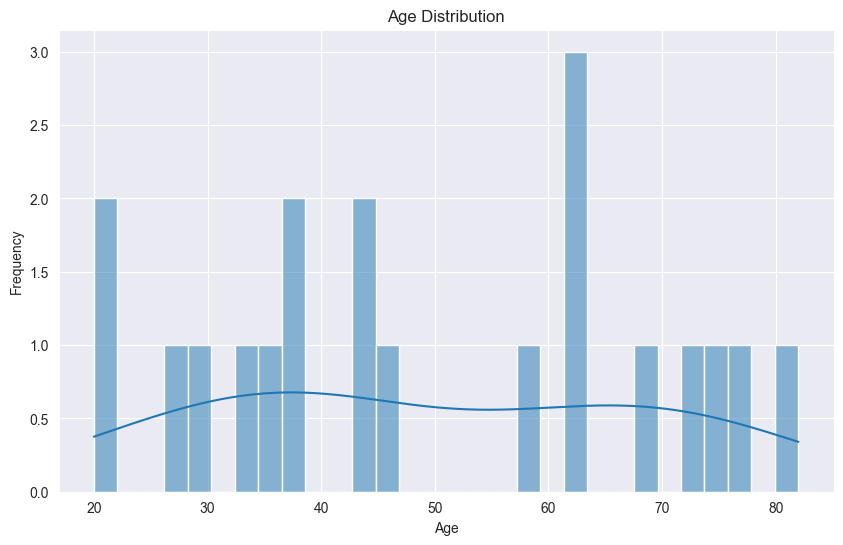

In [20]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

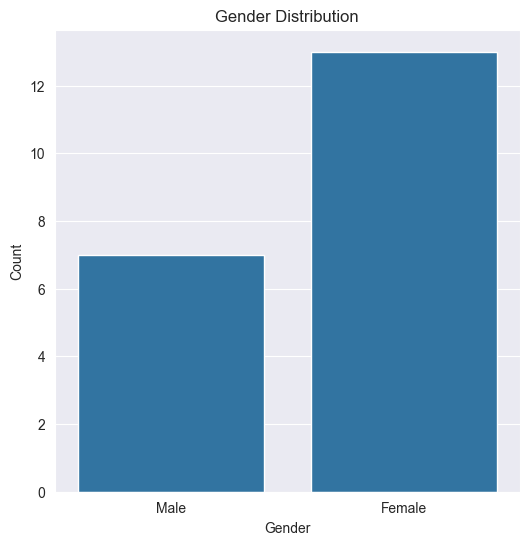

In [21]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

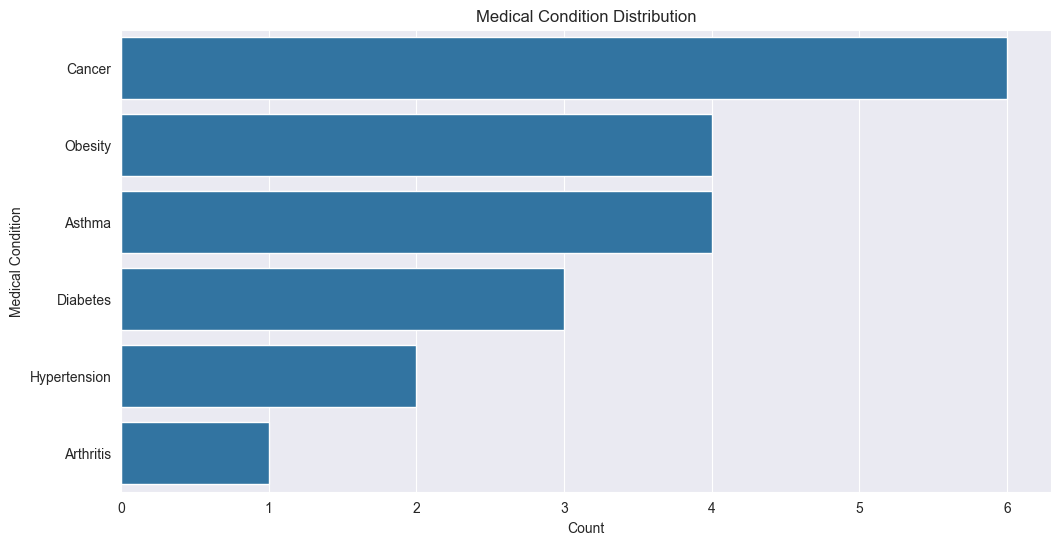

In [22]:
# Medical Condition Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='medical_condition', data=data, order=data['medical_condition'].value_counts().index)
plt.title('Medical Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

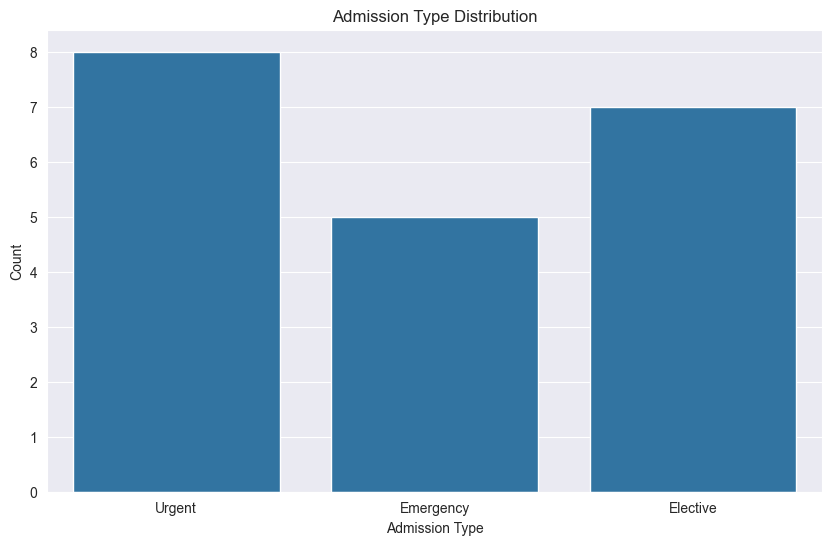

In [23]:
# Admission Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type', data=data)
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

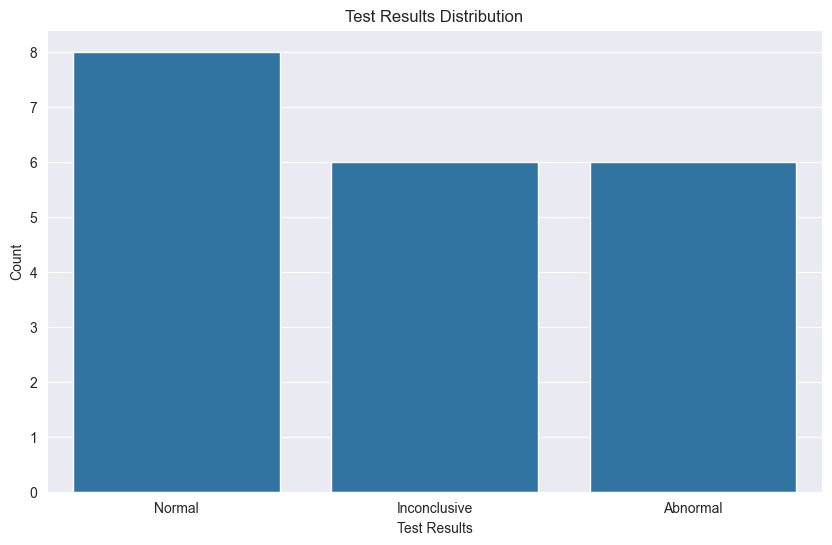

In [26]:
# Test Results Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='test_results', data=data)
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()


# Feature Engineering and Data Preprocessing
We will encode categorical variables, create new features, and prepare the data for machine learning.

In [27]:
# Encoding categorical variables
label_encoders = {}
for column in ['gender', 'blood_type', 'medical_condition', 'doctor_name', 'hospital_name', 'insurance_provider', 'admission_type', 'medication', 'test_results']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [28]:
# Creating new features
data['length_of_stay'] = (data['discharge_date'] - data['date_of_admission']).dt.days


In [29]:
# Drop columns not needed for modeling
data.drop(columns=['patient_name', 'date_of_admission', 'discharge_date'], inplace=True)


In [30]:
# Split the dataset into features and target variable
X = data.drop('test_results', axis=1)
y = data['test_results']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation Analysis
We will calculate the correlation matrix for the dataset and visualize it using a heatmap.

In [33]:
# Correlation Matrix
corr_matrix = data.corr()

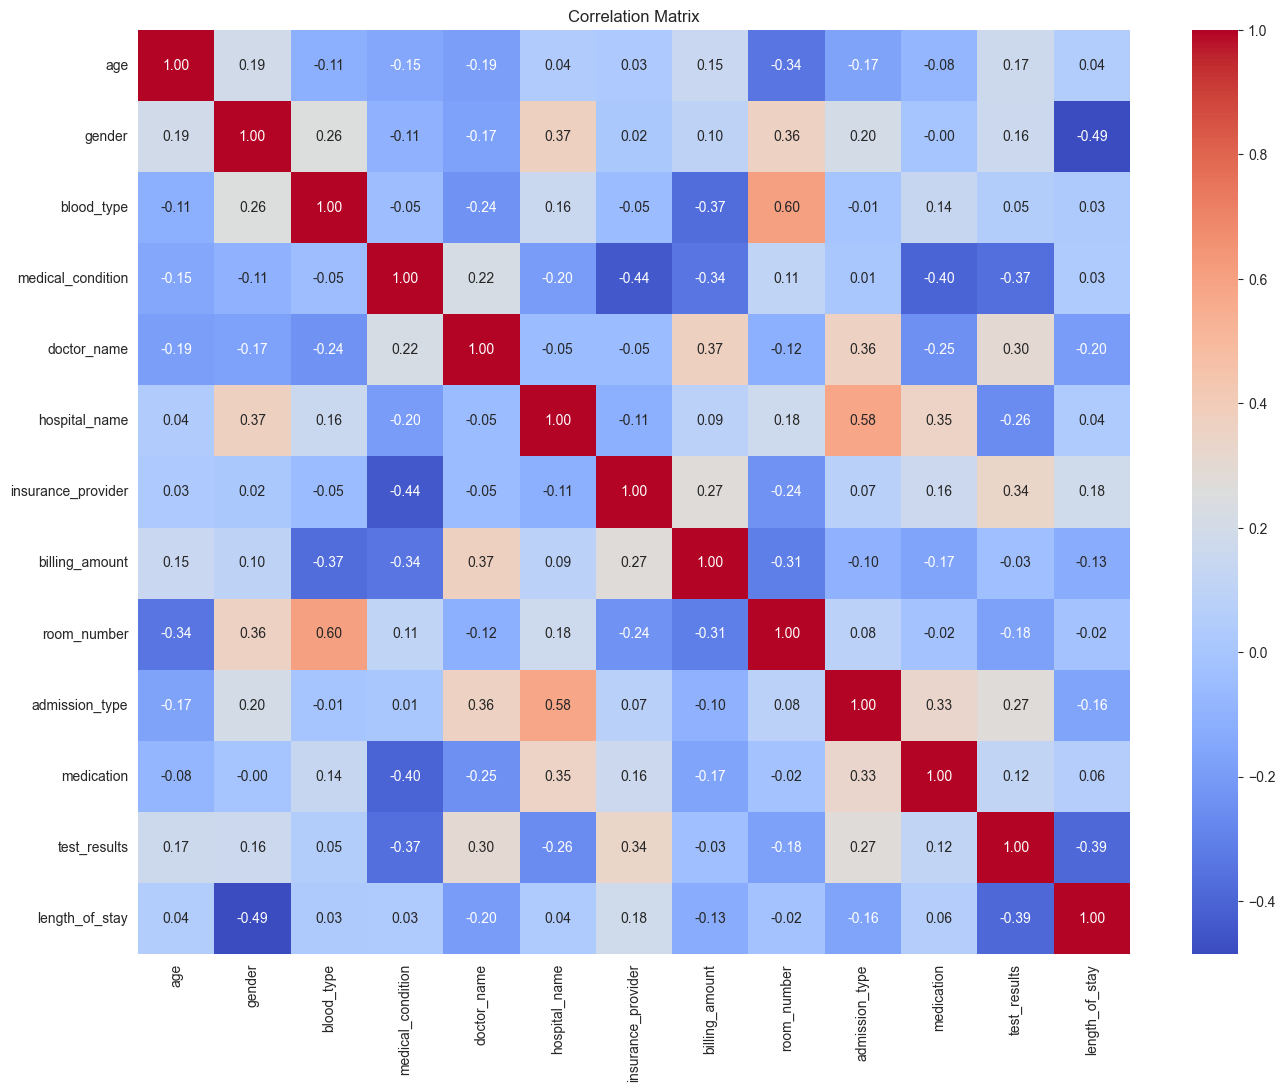

In [34]:
# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Model Building and Evaluation
We will train a Random Forest classifier and evaluate its performance.

In [44]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.00      0.00         2
           2       0.50      1.00      0.67         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.44         4
weighted avg       0.75      0.50      0.33         4

Confusion Matrix:
 [[1 0 0]
 [1 0 1]
 [0 0 1]]


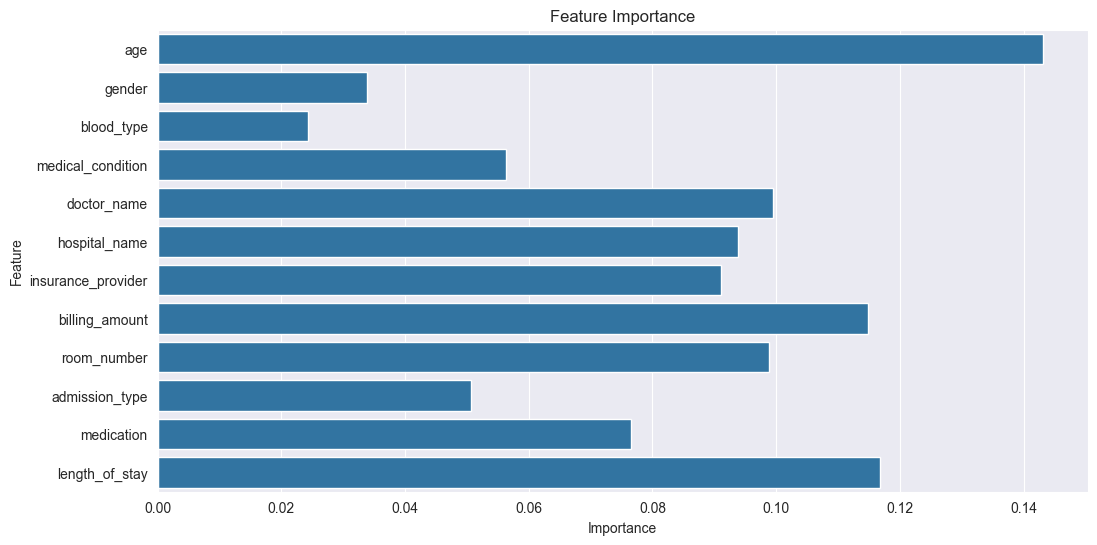

In [45]:
# Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()